# Import all the things that I needed

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read the Csv File

In [68]:
df=pd.read_csv("choclate.csv")

df

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14,"1,652",-$28,-2%
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9,"3,970","$2,736",41%
2,Husein Augar,USA,Almond Choco,$959,147,12,"1,746",-$787,-82%
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6,"1,863","$7,769",81%
4,Curtice Advani,UK,White Choc,"$2,100",414,13,"5,444","-$3,344",-159%
...,...,...,...,...,...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,$938,366,12,"4,348","-$3,410",-364%
296,Gunar Cockshoot,Australia,Baker's Choco Chips,"$8,841",303,6,"1,697","$7,144",81%
297,Barr Faughny,UK,Peanut Butter Cubes,"$4,018",126,12,"1,559","$2,459",61%
298,Carla Molina,New Zealand,Raspberry Choco,$714,231,12,"2,710","-$1,996",-280%


# How many Rows & Columns are available here

In [69]:
df.shape

(300, 9)

# Name of the All columns 

In [70]:
df.columns

Index(['Sales Person', 'Geography', 'Product', 'Amount', 'Units',
       'cost per unit', 'Cost', 'Profit', 'profit %'],
      dtype='object')

# Find first 50 Data 

In [71]:
df.head(50)

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14,"1,652",-$28,-2%
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9,"3,970","$2,736",41%
2,Husein Augar,USA,Almond Choco,$959,147,12,"1,746",-$787,-82%
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6,"1,863","$7,769",81%
4,Curtice Advani,UK,White Choc,"$2,100",414,13,"5,444","-$3,344",-159%
5,Ram Mahesh,USA,Peanut Butter Cubes,"$8,869",432,12,"5,344","$3,525",40%
6,Curtice Advani,Australia,Smooth Sliky Salty,"$2,681",54,6,313,"$2,368",88%
7,Brien Boise,USA,After Nines,"$5,012",210,10,"2,052","$2,960",59%
8,Ches Bonnell,Australia,50% Dark Bites,"$1,281",75,12,878,$404,31%
9,Gigi Bohling,New Zealand,50% Dark Bites,"$4,991",12,12,140,"$4,851",97%


# Try to find that is there any Null values or Not

In [72]:
df.isna()

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
295,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False


In [73]:
df.isnull().sum()

Sales Person     0
Geography        0
Product          0
Amount           0
Units            0
cost per unit    0
Cost             0
Profit           0
profit %         0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   300 non-null    object
 1   Geography      300 non-null    object
 2   Product        300 non-null    object
 3   Amount         300 non-null    object
 4   Units          300 non-null    int64 
 5   cost per unit  300 non-null    int64 
 6   Cost           300 non-null    object
 7   Profit         300 non-null    object
 8   profit %       300 non-null    object
dtypes: int64(2), object(7)
memory usage: 21.2+ KB


# Cleaning the Data

### Replace the dollar sign from Amount & Profit

In [77]:
df['Amount']=df['Amount'].str.replace('$','',regex=True)
df['Amount']=df['Amount'].str.replace(',','',regex=True)
df['Amount']=df['Amount'].astype(np.int64)

In [78]:
df['Profit']=df['Profit'].str.replace('$','',regex=True)
df['Profit']=df['Profit'].str.replace(',','',regex=True)
df['Profit']=df['Profit'].astype(np.int64)

In [79]:
df['Cost']=df['Units'] * df['cost per unit']

In [80]:
df['Profit']= df['Amount'] - df['Cost']

In [84]:
df['profit %'] =df['Profit'] / df['Amount']

In [85]:
df['profit %'] =df['profit %'] *100

In [89]:
df['profit %'] =df['profit %'].round(2).astype(str) +'%'

In [91]:
df=df.rename(columns={'profit %' : 'Profit_Percentage'})

In [92]:
df.head(10)

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,Profit_Percentage
0,Ram Mahesh,New Zealand,70% Dark Bites,1624,114,14,1596,28,1.72%
1,Brien Boise,USA,Choco Coated Almonds,6706,459,9,4131,2575,38.4%
2,Husein Augar,USA,Almond Choco,959,147,12,1764,-805,-83.94%
3,Carla Molina,Canada,Drinking Coco,9632,288,6,1728,7904,82.06%
4,Curtice Advani,UK,White Choc,2100,414,13,5382,-3282,-156.29%
5,Ram Mahesh,USA,Peanut Butter Cubes,8869,432,12,5184,3685,41.55%
6,Curtice Advani,Australia,Smooth Sliky Salty,2681,54,6,324,2357,87.91%
7,Brien Boise,USA,After Nines,5012,210,10,2100,2912,58.1%
8,Ches Bonnell,Australia,50% Dark Bites,1281,75,12,900,381,29.74%
9,Gigi Bohling,New Zealand,50% Dark Bites,4991,12,12,144,4847,97.11%


## GroupBy

In [97]:
g=df.groupby('Geography')

In [98]:
for Geography,Geography_df in g:
    print(Geography)
    print(Geography_df)

Australia
        Sales Person  Geography               Product  Amount  Units  \
6     Curtice Advani  Australia    Smooth Sliky Salty    2681     54   
8       Ches Bonnell  Australia        50% Dark Bites    1281     75   
12      Husein Augar  Australia       Mint Chip Choco    2646    120   
21       Brien Boise  Australia      Fruit & Nut Bars    1701    234   
22        Oby Sorrel  Australia           After Nines    2205    141   
35    Curtice Advani  Australia   Organic Choco Syrup    1134    282   
41      Barr Faughny  Australia      Fruit & Nut Bars    4417    153   
46      Gigi Bohling  Australia  Choco Coated Almonds    5075     21   
53      Barr Faughny  Australia  Caramel Stuffed Bars    6580    183   
63    Curtice Advani  Australia       Mint Chip Choco     938      6   
70        Oby Sorrel  Australia        50% Dark Bites    5586    525   
81      Barr Faughny  Australia             Milk Bars      56     51   
84        Oby Sorrel  Australia             Milk Bars 

In [105]:
g.get_group('Australia')

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,Profit_Percentage
6,Curtice Advani,Australia,Smooth Sliky Salty,2681,54,6,324,2357,87.91%
8,Ches Bonnell,Australia,50% Dark Bites,1281,75,12,900,381,29.74%
12,Husein Augar,Australia,Mint Chip Choco,2646,120,9,1080,1566,59.18%
21,Brien Boise,Australia,Fruit & Nut Bars,1701,234,6,1404,297,17.46%
22,Oby Sorrel,Australia,After Nines,2205,141,10,1410,795,36.05%
35,Curtice Advani,Australia,Organic Choco Syrup,1134,282,17,4794,-3660,-322.75%
41,Barr Faughny,Australia,Fruit & Nut Bars,4417,153,6,918,3499,79.22%
46,Gigi Bohling,Australia,Choco Coated Almonds,5075,21,9,189,4886,96.28%
53,Barr Faughny,Australia,Caramel Stuffed Bars,6580,183,10,1830,4750,72.19%
63,Curtice Advani,Australia,Mint Chip Choco,938,6,9,54,884,94.24%


In [106]:
g.get_group('Canada')

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,Profit_Percentage
3,Carla Molina,Canada,Drinking Coco,9632,288,6,1728,7904,82.06%
25,Carla Molina,Canada,Milk Bars,10311,231,9,2079,8232,79.84%
28,Gigi Bohling,Canada,Fruit & Nut Bars,6314,15,6,90,6224,98.57%
47,Gunar Cockshoot,Canada,Mint Chip Choco,9198,36,9,324,8874,96.48%
50,Gigi Bohling,Canada,Mint Chip Choco,16184,39,9,351,15833,97.83%
51,Curtice Advani,Canada,Spicy Special Slims,497,63,9,567,-70,-14.08%
52,Barr Faughny,Canada,Manuka Honey Choco,8211,75,7,525,7686,93.61%
55,Ram Mahesh,Canada,White Choc,5439,30,13,390,5049,92.83%
61,Curtice Advani,Canada,Choco Coated Almonds,6118,9,9,81,6037,98.68%
62,Oby Sorrel,Canada,Fruit & Nut Bars,2317,261,6,1566,751,32.41%


In [107]:
g.get_group('India')

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,Profit_Percentage
13,Barr Faughny,India,Milk Bars,252,54,9,486,-234,-92.86%
17,Gigi Bohling,India,Orange Choco,15610,339,11,3729,11881,76.11%
18,Carla Molina,India,After Nines,336,144,10,1440,-1104,-328.57%
20,Husein Augar,India,Fruit & Nut Bars,8155,90,6,540,7615,93.38%
38,Ches Bonnell,India,Choco Coated Almonds,3262,75,9,675,2587,79.31%
39,Ram Mahesh,India,Organic Choco Syrup,2289,135,17,2295,-6,-0.26%
40,Gigi Bohling,India,Organic Choco Syrup,6986,21,17,357,6629,94.89%
42,Curtice Advani,India,Raspberry Choco,1442,15,12,180,1262,87.52%
48,Curtice Advani,India,Manuka Honey Choco,3339,75,7,525,2814,84.28%
49,Ram Mahesh,India,Eclairs,5019,156,3,468,4551,90.68%


In [108]:
g.get_group('New Zealand')

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,Profit_Percentage
0,Ram Mahesh,New Zealand,70% Dark Bites,1624,114,14,1596,28,1.72%
9,Gigi Bohling,New Zealand,50% Dark Bites,4991,12,12,144,4847,97.11%
11,Gunar Cockshoot,New Zealand,Eclairs,3983,144,3,432,3551,89.15%
16,Curtice Advani,New Zealand,Smooth Sliky Salty,7693,87,6,522,7171,93.21%
23,Brien Boise,New Zealand,99% Dark & Pure,1771,204,8,1632,139,7.85%
29,Oby Sorrel,New Zealand,Fruit & Nut Bars,4683,30,6,180,4503,96.16%
30,Carla Molina,New Zealand,85% Dark Bars,6398,102,5,510,5888,92.03%
37,Curtice Advani,New Zealand,Mint Chip Choco,1904,405,9,3645,-1741,-91.44%
44,Barr Faughny,New Zealand,99% Dark & Pure,238,18,8,144,94,39.5%
45,Curtice Advani,New Zealand,Fruit & Nut Bars,4949,189,6,1134,3815,77.09%


In [109]:
g.get_group('UK')

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,Profit_Percentage
4,Curtice Advani,UK,White Choc,2100,414,13,5382,-3282,-156.29%
10,Barr Faughny,UK,White Choc,1785,462,13,6006,-4221,-236.47%
19,Barr Faughny,UK,Orange Choco,9443,162,11,1782,7661,81.13%
26,Gunar Cockshoot,UK,Mint Chip Choco,21,168,9,1512,-1491,-7100.0%
32,Brien Boise,UK,70% Dark Bites,7021,183,14,2562,4459,63.51%
33,Ram Mahesh,UK,After Nines,5817,12,10,120,5697,97.94%
34,Carla Molina,UK,50% Dark Bites,3976,72,12,864,3112,78.27%
36,Barr Faughny,UK,Caramel Stuffed Bars,6027,144,10,1440,4587,76.11%
80,Brien Boise,UK,Smooth Sliky Salty,8890,210,6,1260,7630,85.83%
85,Barr Faughny,UK,Organic Choco Syrup,7812,81,17,1377,6435,82.37%


In [110]:
g.get_group('USA')

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,Profit_Percentage
1,Brien Boise,USA,Choco Coated Almonds,6706,459,9,4131,2575,38.4%
2,Husein Augar,USA,Almond Choco,959,147,12,1764,-805,-83.94%
5,Ram Mahesh,USA,Peanut Butter Cubes,8869,432,12,5184,3685,41.55%
7,Brien Boise,USA,After Nines,5012,210,10,2100,2912,58.1%
14,Gunar Cockshoot,USA,White Choc,2464,234,13,3042,-578,-23.46%
15,Gunar Cockshoot,USA,Manuka Honey Choco,2114,66,7,462,1652,78.15%
24,Carla Molina,USA,Raspberry Choco,2114,186,12,2232,-118,-5.58%
27,Oby Sorrel,USA,Orange Choco,1974,195,11,2145,-171,-8.66%
31,Barr Faughny,USA,99% Dark & Pure,553,15,8,120,433,78.3%
43,Gunar Cockshoot,USA,50% Dark Bites,2415,255,12,3060,-645,-26.71%


In [102]:
g.describe()

Amount                                                             \
             count         mean          std    min      25%     50%      75%   
Geography                                                                       
Australia     46.0  3666.934783  2736.204788   56.0  1386.00  2663.5  5675.25   
Canada        50.0  4758.880000  3776.047765   98.0  1625.75  3556.0  6571.25   
India         58.0  4352.913793  3208.516503  252.0  2058.00  3598.0  6744.50   
New Zealand   53.0  4128.547170  3073.880657   42.0  1526.00  3556.0  6398.00   
UK            40.0  4338.250000  2940.333208    0.0  1958.25  3997.0  6032.25   
USA           53.0  3574.226415  2835.615953   98.0  1638.00  2562.0  4753.00   

                     Units              ...     Cost         Profit  \
                 max count        mean  ...      75%     max  count   
Geography                               ...                           
Australia    10129.0  46.0  136.173913  ...  1593.00  6300.0   46.0   
Canada       16184.0  50.0  146.040000  ...  1680.75  8823.0   50.0   
India        15610.0  58.0  151.034483  ...  1955.25  5412.0   58.0   
New Zealand  11571.0  53.0  140.207547  ...  2028.00  4590.0   53.0   
UK           12950.0  40.0  143.625000  ...  1516.50  6006.0   40.0   
USA          13391.0  53.0  191.660377  ...  2970.00  6258.0   53.0   

                                                                        \
                    mean          std     min     25%     50%      75%   
Geography                                                                
Australia    2355.217391  2824.042460 -3771.0  314.75  2034.0  4595.00   
Canada       3401.260000  4252.107635 -8025.0  299.75  2699.0  6191.25   
India        2946.844828  3112.392879 -2496.0  544.25  2613.5  4788.75   
New Zealand  2831.641509  3567.708595 -3454.0  -60.00  2359.0  5698.00   
UK           2999.875000  3465.311835 -4221.0  725.00  3043.0  5377.50   
USA          1545.433962  2760.960177 -3983.0 -347.00  1892.0  2912.00   

                      
                 max  
Geography             
Australia     8462.0  
Canada       15833.0  
India        12829.0  
New Zealand  10743.0  
UK           12590.0  
USA          10979.0  

[6 rows x 40 columns]

Geography
Australia      AxesSubplot(0.125,0.125;0.775x0.755)
Canada         AxesSubplot(0.125,0.125;0.775x0.755)
India          AxesSubplot(0.125,0.125;0.775x0.755)
New Zealand    AxesSubplot(0.125,0.125;0.775x0.755)
UK             AxesSubplot(0.125,0.125;0.775x0.755)
USA            AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

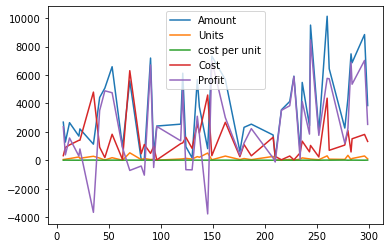

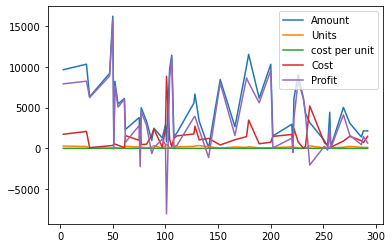

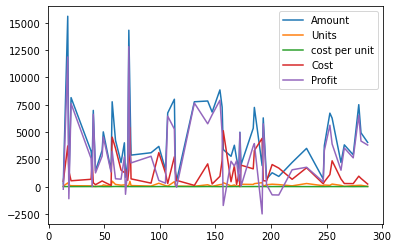

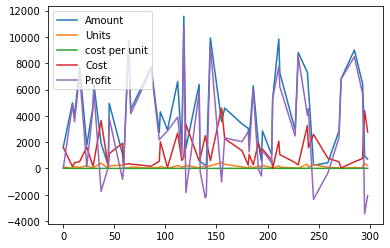

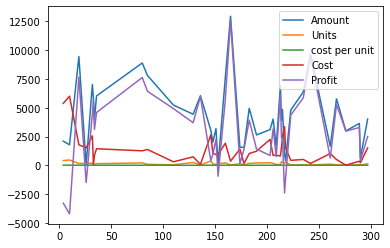

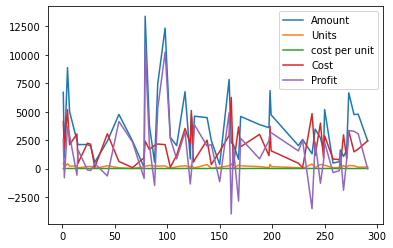

In [103]:
g.plot()

<AxesSubplot:ylabel='Amount'>

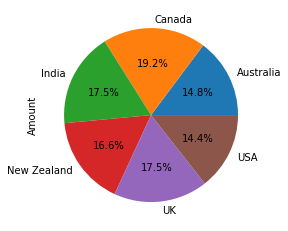

In [148]:
g['Amount'].mean().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='Profit'>

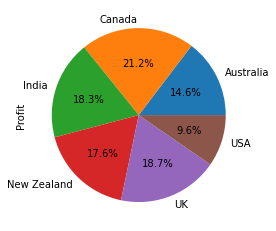

In [149]:
g['Profit'].mean().plot(kind='pie',autopct='%0.1f%%')

## Pivot Table 

In [125]:
df.pivot_table(index='Sales Person',columns='Geography',values='Profit',aggfunc='count',margins=True)

Geography,Australia,Canada,India,New Zealand,UK,USA,All
Sales Person,,,,,,,
Barr Faughny,5,5,2,5,10,2,29
Brien Boise,6,1,2,6,4,7,26
Carla Molina,2,7,5,6,1,5,26
Ches Bonnell,4,6,8,7,2,7,34
Curtice Advani,7,6,9,7,5,4,38
Gigi Bohling,4,6,7,4,4,6,31
Gunar Cockshoot,1,5,8,4,4,6,28
Husein Augar,6,4,6,7,3,4,30
Oby Sorrel,4,5,5,3,2,5,24


In [126]:
df.pivot_table(index='Sales Person',columns='Geography',values='Profit',aggfunc='sum')

Geography,Australia,Canada,India,New Zealand,UK,USA
Sales Person,,,,,,
Barr Faughny,13597,12552,6317,22928,28607,1113
Brien Boise,4617,4119,1817,13030,22986,6005
Carla Molina,5766,26393,9429,8145,3112,7787
Ches Bonnell,9397,14800,21866,34136,1300,18292
Curtice Advani,6622,23606,18778,15312,6821,-1507
Gigi Bohling,22617,36080,29301,13049,13083,20848
Gunar Cockshoot,7023,14979,22830,6459,6354,2476
Husein Augar,20612,18220,29506,11471,6061,3237
Oby Sorrel,4385,5211,13131,4945,14937,5288


In [134]:
df.pivot_table(index='Product',columns='Geography',values='Profit',aggfunc='sum',margins=True,fill_value=0)

Geography,Australia,Canada,India,New Zealand,UK,USA,All
Product,,,,,,,
50% Dark Bites,-333,0,1451,9164,3112,5525,18919
70% Dark Bites,5761,11991,-1722,1260,5215,4767,27272
85% Dark Bars,4205,0,7917,5888,8527,3621,30158
99% Dark & Pure,4130,1996,12297,7758,0,2915,29096
After Nines,6008,8015,6618,7473,11954,5695,45763
Almond Choco,13762,8418,-51,-5679,0,-1691,14759
Baker's Choco Chips,8952,-1126,19453,20739,10259,-856,57421
Caramel Stuffed Bars,7847,-2883,13398,8262,6070,7609,40303
Choco Coated Almonds,6721,20265,11455,0,0,12817,51258
